Bu projede  *Titanic: Machine Learning from Disaster*  veri seti kullanılarak, Titanik'te bulunan bir kişinin hayatta kalıp kalmayacağını tahmin ediyoruz.

**1)  Gerekli Kütüphanelerin Import İşlemleri**

In [1]:
import numpy as np 
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**2) Keşifçi Veri Analizi**

In [2]:
#train ve test dataset okumalarını yapıyoruz
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')                                                               
                       

In [3]:
#train setimize kısa bir bakış yapıyoruz head() ile 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#test setimize kısa bir bakış yapıyoruz şimdi de
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Test setimizde Survived kategorik değişkenimiz yok çünkü amacımız buradaki Survived değişkenini tahmin edebilmek.

In [5]:
#train setimize info() kullanarak değişken bazında bir inceleme yapıyoruz
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**3) Veri Analizi :**

In [6]:
#train setimizdeki bütün değişkenleri(sütunları) yazdırıyoruz
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

** Değişkenlerimizin Tipleri : **

* Kategorik : Pclass, Sex, Embarked, Survived
* Sürekli : Age, Fare, Sibsp, Parch, PassengerId
* Alfanümerik: Ticket, Cabin, Name

In [7]:
#Değişkenlerimize ait istatistiksel özellikleri yazdırıyoruz
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Yukarıdaki tablodan çıkarttığımız bazı özellikler şunlardır:
* Train veri setimizde toplam 891 yolcu bulunmaktadır.
* Survived değişkenimizin mean değerinin 0.3838 olması bize hayatta kalanların yüzdesinin %38 olduğunu söylemektedir.
* Yolcuların çoğunun yolculuk yaptığı sınıf 3. sınıftır. Pclass = 3

In [8]:
#Train veri setimizdeki eksik değerlerin yüzdesini buluyoruz
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
#Train veri setimizdeki eksik değerlerin yüzdesini buluyoruz
test_df.isnull().sum()/ len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Gördüğümüz gibi, Age ve Embarked sütunlarında eksik değerler mevcut ve doldurmamız gerek.
Cabin sütununa özel olarak baktığımızda Train setinde %77, test setinde %78 boş değerler mevcut. Belki bu değişkeni veri setimizden çıkartmayı düşünebiliriz.

**4) Veri Görselleştirme**

**Sex(Cinsiyet) Değişkeni**

male      577
female    314
Name: Sex, dtype: int64

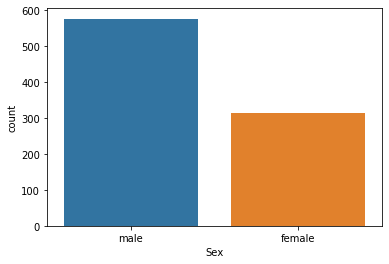

In [10]:
sns.countplot('Sex',data=train_df)
train_df['Sex'].value_counts()

Görüyoruz ki grafikteki erkek sayısı kadın sayısından fazla. Aşağıda da hayatta kalma olasılıklarına bakacağız.

,Sex,Survived
0,female,0.742038
1,male,0.188908


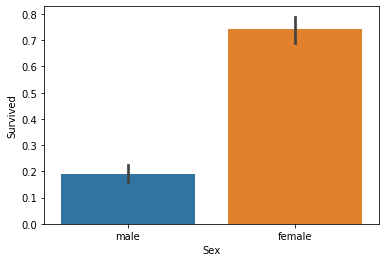

In [11]:
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

Yukarıdaki grafikte gördüğümüz gibi hayatta kalan kadınların sayısı erkeklerden daha fazla.

**Pclass (Sınıf) Değişkeni**

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


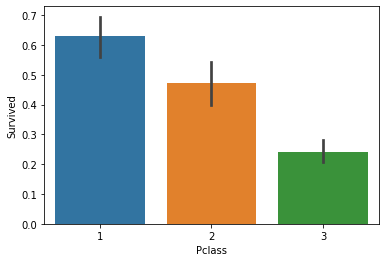

In [12]:
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

İlk tabloda gördüğümüz gibi 1.Sınıfta yolculuk ediyorsanız hayatta kalma şansınız ~%63, 2.Sınıfta ~%47, 3.Sınıfta ise ~%24.
Açıkça görünüyor ki 1.Sınıfta yolcukuk ediyorsanız büyük bir avantajınız var demektir.

Peki yolcuların gemiye giriş yaptıkları limanın hayatta kalmaları üzerinde etkisi var mıydı?

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


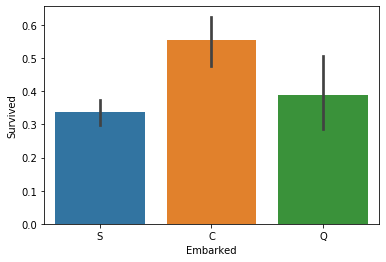

In [13]:
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Görünen o ki Cherbourg limanından binen yolcuların %55'i hayatta kalabilmiş.

Aşağıda aile ile veya çocuk ile birlikte olmanın hayatta kalmaya etkisine bakacağız.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


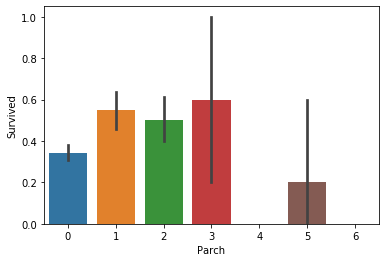

In [14]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Şimdi ise eş veya kardeş ile birlikte olmanın etkisini inceleyeceğiz.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


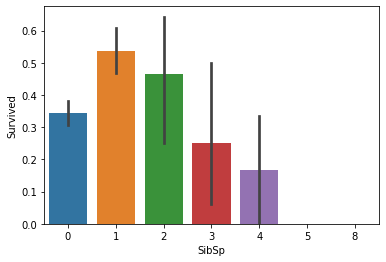

In [15]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Aşağıda, Age(Yaş) değişkeninin boş değerlerini doldurmadan önce ortalama ve standart sapma değerleri ile yaş aralıklarının sayısını görüyoruz.

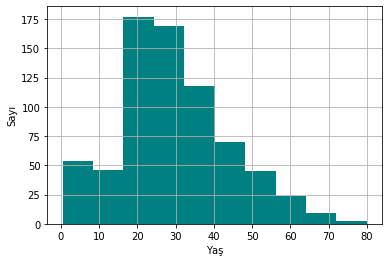

Yolcuların ortalama yaşı : 28
Yolcuların yaşlarının standart sapması : 14


In [16]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Yaş')
plt.ylabel('Sayı')
plt.show()
print("Yolcuların ortalama yaşı :", int(train_df.Age.median()))
print("Yolcuların yaşlarının standart sapması :", int(train_df.Age.std()))

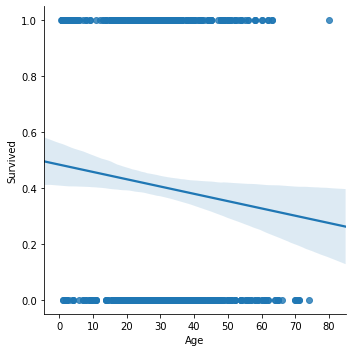

In [17]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

Yukarıdaki grafikte yaşa bağlı olarak hayatta kalma oranının nasıl değiştiğini görüyoruz. Yaş arttıkça hayatta kalma oranı düşüyor. <br>
Aşağıda ise cinsiyet değişkenini de işin içine katıyoruz.

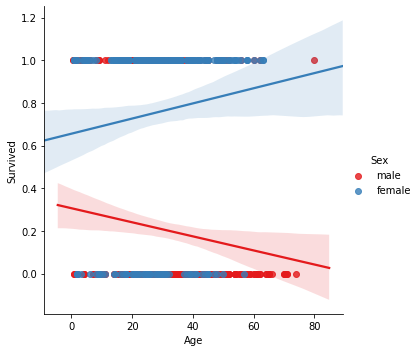

In [18]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

Erkeklerde yaş ilerledikçe hayatta kalma oranı düşerken, kadınlarda ise yaş ilerledikçe hayatta kalma oranı artıyor.

In [19]:
#Cinsiyetlere göre yaş ortalamaları
train_df.groupby('Sex',as_index=False)['Age'].median()

,Sex,Age
0,female,27.0
1,male,29.0


**5) Veri Ön İşleme**

İhtiyacımız olmayan sütunları veri setlerimizden çıkartarak başlayalım.

In [20]:
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


Şimdi, train setimizdeki Embarked sütununda bulunan boş değerlerimizi dolduralım. <br>
İnsanların çoğu Southhampton'dan giriş yaptıkları için boş satırları "S" ile dolduruyoruz.

In [21]:
train_df.Embarked.fillna('S',inplace=True)
test_df.Embarked.fillna('S',inplace=True)

Age(yaş) sütunundaki NaN değerleri ortalama yaş ile dolduracağız.

In [22]:
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)

Test veri setimizdeki, Fare sütununda bulunan null değerleri ortalama Fare ile dolduracağız. 

In [23]:
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

**6) Değişken Mühendisliği**

Name(İsim) değişkeni modelimiz açısından direkt olarak etkili olmayabilir fakat isimlerde bulunan ünvanlar (Mr, Mrs, Lady) dolaylı yoldan bireylerin hayatta kalma oranlarını etkileyebilir. 

Modelimizin performansını artırmak için "Name" sütunundan ünvanları kaldıracağız.

In [24]:
#train ve test setlerimizi birleştiriyoruz
Combined_data = [train_df, test_df]

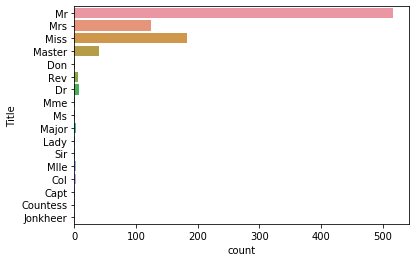

In [25]:
#ünvanları kaldırma işlemi
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#çıkartılan ünvanların görselleştirilmesi
sns.countplot(y='Title',data=train_df)  

ünvanlar için Title sütunnu oluşturacağız.

In [26]:
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


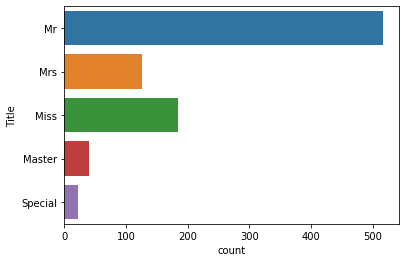

In [27]:
#aşağıda ünvan özelliğinin dağılımını görüyoruz
sns.countplot(y='Title',data=train_df)

In [28]:
#ünvanları map ediyoruz ve numerik değişkenlere dönüştürmüş oluyoruz
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

Şimdi, IsAlone sütunu oluşturacağız. Parch ve SibSp değişkenlerini kullanarak hesaplayacağız. Veri görselleştirmelerden anladık ki yalnız olmak hayatta kalma şansını etkiliyor ve biz de bunu kullanmalıyız.

In [29]:
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


Artık lazım olmayan sütunları veri setimizden çıkartıyoruz.

In [30]:
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

Age(Yaş) değişkeninin hayatta kalma konusunda çok önemli olduğunu ve gençlerin daha fazla hayatta kalma şansı olduğunu biliyoruz. Bu sebepten ötürü 15 yaşından küçük olanları göstermek için IsMinor değişkeni oluşturuyoruz.

In [31]:
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

Yaşlı kadınların da daha fazla ahyatta kalma şansları olduklarını biliyoruz. Bundan dolatyı Old_female değişkeni oluşturuyoruz. 50 yaşından büyük olanlar için.

In [32]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

get_dummies methodunu kullanarak kategorik değişkenlerimizi numerik değişkenlere çeviriyoruz.
- Pclass
- Sex
- Embarked

In [33]:
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,0,1,1,0,1
1,1,38.0,71.2833,3,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,2,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,3,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,0,0,1,1,0,1


Yaş ve Ücret değişkneleri sürekli değişkenler ve verilerde parazitler olabilir. Bu yüzden bunları aralıklı değerlere dönüştüreceğiz. Bunu da pandas içinden *qcut* methodu ile yapacağız.

In [34]:
#age
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 

In [35]:
#fare
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [36]:
#age ve fare sütunlarını kaldırıyoruz
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

Test ve train setlerimizin son hallerine bir göz atalım.

In [37]:
train_df2.head(3)

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,0,1,1,0,1,0,0
1,1,3,0,0,0,0,0,0,0,0,3,6
2,1,2,1,0,0,0,1,0,0,1,1,1


In [38]:
test_df2.head(3)

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,0,1,1,1,0,2,1
1,3,0,0,0,0,1,0,0,1,3,0
2,1,1,0,0,1,0,1,1,0,3,2


**7) Makine Öğrenmesi**

In [39]:
#gerekli olan ML kütüphanelerini import ediyoruz
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [40]:
from warnings import filterwarnings
filterwarnings('ignore')
#altta çıkan gereksiz pembe hataları almamak için

In [104]:
X = train_df2.drop("Survived",axis=1) 
y = train_df2["Survived"]

#veri setimizi train ve test olarak bölüyoruz 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [105]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled[0:5]

array([[ 2.26881256, -1.21740368, -0.32645357, -0.12772319, -0.51849697,
         0.87743169,  0.72077194, -0.31117678, -1.6660605 , -0.32383045,
         0.0309874 ],
       [-0.69650959,  0.82142022, -0.32645357, -0.12772319,  1.92865159,
        -1.13968987,  0.72077194, -0.31117678,  0.6002183 ,  0.58086179,
        -0.46401641],
       [-0.69650959,  0.82142022, -0.32645357, -0.12772319, -0.51849697,
         0.87743169,  0.72077194, -0.31117678,  0.6002183 , -1.22852268,
        -0.95902022],
       [ 0.29193113, -1.21740368,  3.0632227 , -0.12772319,  1.92865159,
        -1.13968987, -1.38740139, -0.31117678,  0.6002183 , -1.22852268,
         1.02099501],
       [ 0.29193113, -1.21740368,  3.0632227 , -0.12772319, -0.51849697,
         0.87743169, -1.38740139, -0.31117678, -1.6660605 , -1.22852268,
        -0.46401641]])

In [108]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [109]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [110]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)*100

79.8507462686567

## Model Tuning

In [111]:
mlpc_params = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}

In [112]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [121]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [114]:
mlpc_tuned = MLPClassifier(activation = "tanh", 
                           alpha = 0.05, 
                           hidden_layer_sizes = (50, 50, 50),
                           learning_rate = "adaptive",
                          solver = "adam")

In [115]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [116]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)*100

78.73134328358209

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.77      0.69      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



## Bir Kişi İçin Tahmin Yapma

In [119]:
test_df2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,0,1,1,1,0,2,1
1,3,0,0,0,0,1,0,0,1,3,0
2,1,1,0,0,1,0,1,1,0,3,2
3,1,1,0,0,0,1,1,0,1,1,2
4,3,0,0,0,0,1,0,0,1,0,2


In [120]:
y_final = mlpc_tuned.predict(test_df2)

y_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [126]:
submission = pd.DataFrame({
        "PassengerId": test_passenger_df["PassengerId"],
        "Survived": y_final
    })
submission.head()
submission.to_csv('titanic.csv', index=False)

In [123]:
from collections import OrderedDict

In [124]:
new_data = OrderedDict([
     ('Pregnancies', 2),
    ('Glucose', 87),
    ('BloodPressure', 345),
    ('SkinThickness', 56),
    ('Insulin', 1),
    ('BMI', 1),
    ('DiabetesPedigreeFunction', 0.657),
    ('Age', 67)
])

new_data = pd.Series(new_data).values.reshape(1,-1)

In [125]:
y_pred = mlpc_tuned.predict(new_data)
y_pred

array([0], dtype=int64)